# <b> <p align="center"> <span style="color: Pink "> PyTorch Custom Dataset <span> </p> </b>
### <b> <p align="center"> <span style="color: Green "> Food Vision mini <span> </p> </b>

## 0. Importing pytorch and set up device agnostics

In [75]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pathlib


from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple,Dict,List


In [76]:
# Device agnostics
device = "cuda" if torch.cuda.is_available() else "cpu" 
device

'cuda'

## 1. Get data

Our dataset is sub of the Food101 dataset.

Food101 starts 101 different classes of food and 1000 images per classes(705 training and 250 testing)

Dataset starts with 3 classes of food and only 10% of the images (~ 75 training , 25 testing)

When starting our ML projects, it's important to try things on a small scale and then increase the scale when necessary 

The whole point is to speed up how fast can make experiment.

In [77]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)

data\pizza_steak_sushi directory exists.


In [78]:
if image_path == data_path/"pizza_steak_sushi":
    print("yes")

yes


## 2. Becoming one with the data(data preparation and data exploration)

In [79]:
def walk_through_dir(dir_path):
    """Walks through dir_path returning its contents"""

    for dirpath,dirname,filename in os.walk(dir_path):
        print(f"There are {len(dirname)} directory and {len(filename)} image files in the '{dirpath}' ")


walk_through_dir(data_path)

There are 2 directory and 1 image files in the 'data' 
There are 1 directory and 0 image files in the 'data\FashionMNIST' 
There are 0 directory and 8 image files in the 'data\FashionMNIST\raw' 
There are 2 directory and 0 image files in the 'data\pizza_steak_sushi' 
There are 3 directory and 0 image files in the 'data\pizza_steak_sushi\test' 
There are 0 directory and 25 image files in the 'data\pizza_steak_sushi\test\pizza' 
There are 0 directory and 19 image files in the 'data\pizza_steak_sushi\test\steak' 
There are 0 directory and 31 image files in the 'data\pizza_steak_sushi\test\sushi' 
There are 3 directory and 0 image files in the 'data\pizza_steak_sushi\train' 
There are 0 directory and 78 image files in the 'data\pizza_steak_sushi\train\pizza' 
There are 0 directory and 75 image files in the 'data\pizza_steak_sushi\train\steak' 
There are 0 directory and 72 image files in the 'data\pizza_steak_sushi\train\sushi' 


In [80]:
# Setup train and testing paths 

train_dir = image_path/"train"
test_dir=image_path/"test"

train_dir,test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

### 2.1 Visualize an image

Let's write some code to :
 
 1. Get all of the image paths
 2. Pick a random image path using Python's random.choice()
 3. Get the image class name using `pathlib.Path.parent.stem`
 4. Since we're working with image, let's open the image with Python's PIL
 5. We'll then show the image and print metadata

In [81]:
image_path

WindowsPath('data/pizza_steak_sushi')

In [82]:
import random


random.randint(1,100)

28

sushi
Random image path: data\pizza_steak_sushi\train\sushi\3360207.jpg
image class : sushi
image_height: 384
image widht: 512


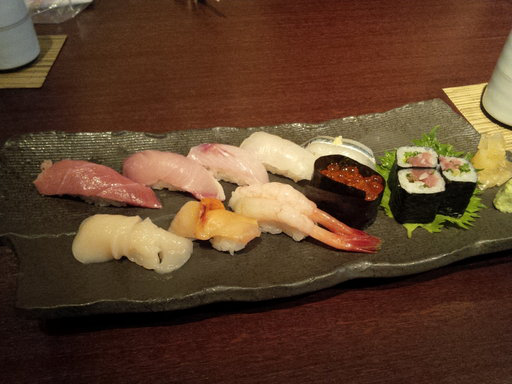

In [83]:
import random
from PIL import Image

# Set seed
random.seed(random.randint(1,100))

# 1. Get all image path
image_path_list=list(image_path.glob("*/*/*.jpg"))
image_path_list

# 2. Pick a random image path
random_image_path= random.choice(image_path_list)
random_image_path

# 3. Get image class from path name ( the class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem
print(image_class)

# 4. Open image

img= Image.open(random_image_path) #opening an image using Python Image Liabrary (PIL)

# 5. Print metadata

print(f"Random image path: {random_image_path}")
print(f"image class : {image_class}")
print(f"image_height: {img.height}")
print(f"image widht: {img.width}")
img

Try to visualize image/images with matplotlib

Random image path: data\pizza_steak_sushi\test\pizza\309892.jpg
image class : sushi
image_height: 333
image widht: 512


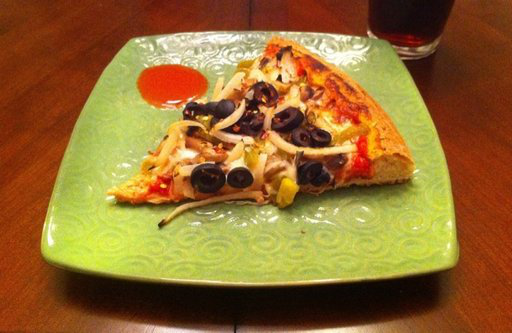

In [84]:
torch.manual_seed(random.randint(1,100))

# 1. get all image path
image_path_list=list(image_path.glob("*/*/*.jpg"))
image_path_list

# 2. pick a random image path
random_image_path=random.choice(image_path_list)
random_image_path

# 3. viewing the random image class
img_class=random_image_path.parent.stem
img_class

# 4. open the random image
img=Image.open(random_image_path)
img

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"image class : {image_class}")
print(f"image_height: {img.height}")
print(f"image widht: {img.width}")
img



Text(0.5, 1.0, 'Image class: sushi | Image shpape : (333, 512, 3) -> [hight, width , color_channel]')

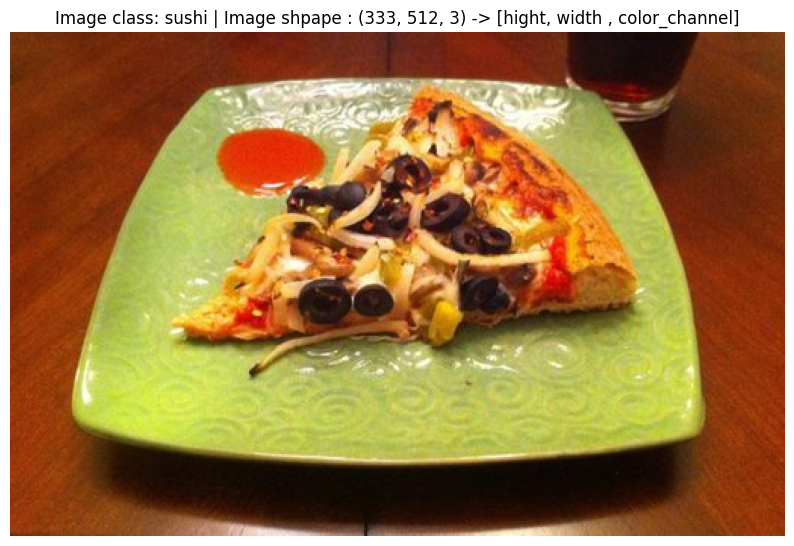

In [85]:
# Turn the image into array

img_array=np.asarray(img)
img_array

# Plot the image with matplotlib

plt.figure(figsize=(10,7))
plt.imshow(img_array)
plt.axis(False)
title_des=f"Image class: {image_class} | Image shpape : {img_array.shape} -> [hight, width , color_channel]"
plt.title(title_des)

## 3. Transforming Data 

Before we can use our image data with pytorch :
 
 1. Turn your target data into tensor( in this case, numerical representation of our images)
 2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DataLoader` we'll call these `Dataset` and `DataLoader`

In [86]:
from torch.utils.data import DataLoader
from torchvision import datasets ,transforms

### 3.1 Transform data with `torchvision.transforms`

In [87]:
# Write a transform for image

data_transform = transforms.Compose([
    # Resize our images to 64x64
    transforms.Resize(size=(64,64)),
    # Flip the images randomly on the horizontal 
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch tensor
    transforms.ToTensor()

])

In [88]:
data_transform(img).shape

torch.Size([3, 64, 64])

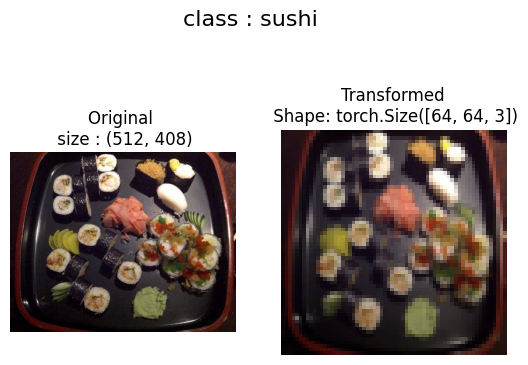

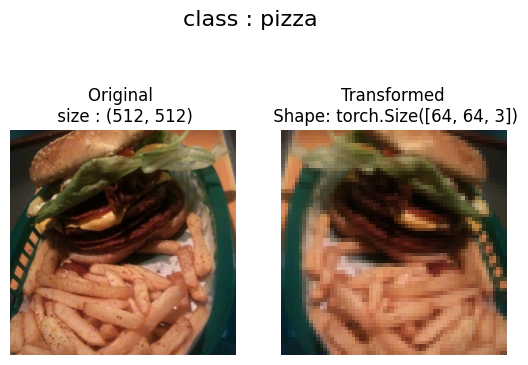

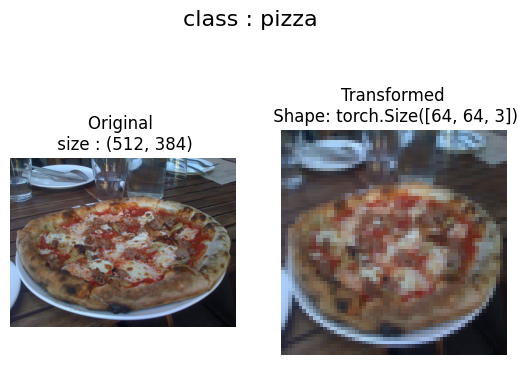

In [89]:
def plot_transformed_images(image_path_list,transforms,n=3,seed=None):

    """
    Selects random images from a path of images and loads/transforms them 
    then plots original vs the transformed version
    """

    if seed:
        random.seed(seed)
    
    random_image_path=random.sample(image_path_list,k=n)
    
    for image_path in random_image_path:
        with Image.open(image_path) as f:
            fig , ax = plt.subplots(nrows=1,ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \n size : {f.size}")
            ax[0].axis(False)

            # Transform and plot target image

            transformed_image=transforms(f).permute(1,2,0) # note need to chagne shape for matplotlib
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\n Shape: {transformed_image.shape}")
            ax[1].axis(False)


            fig.suptitle(f"class : {image_path.parent.stem}",fontsize=16)

plot_transformed_images(image_path_list=image_path_list,
                        transforms=data_transform,
                        seed=42,
                        n=3)




## 4. Options 1: Loading image data using `ImageFolder`
We can load image classification data using `torchvision.datasets.ImageFolder`

In [90]:
# using ImageFolder to create dataset(s)

from torchvision import datasets
train_data=datasets.ImageFolder(root=train_dir,
                                transform=data_transform, #transform for the data
                                target_transform=None, #a transform for the label/target
                                )

test_data=datasets.ImageFolder(root=test_dir,
                               transform=data_transform,
                               target_transform=None)

train_data,test_data


(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [91]:
train_data.root

WindowsPath('data/pizza_steak_sushi/train')

In [92]:
train_dir,test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

In [93]:
# Get class name as list

class_name=train_data.classes
class_name

['pizza', 'steak', 'sushi']

In [94]:
# Get class names as dict

class_dict=train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [95]:
# Check the lenght of our dataset

len(train_data) , len(test_data)

(225, 75)

In [96]:
train_data.samples[0],train_data.targets[0]

(('data\\pizza_steak_sushi\\train\\pizza\\1008844.jpg', 0), 0)

In [97]:
# Index on the train_data Dataset to get a single image and label/target

train_data[0][0]

tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0863],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0706],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0196,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0902, 0.0902, 0.

In [98]:
train_data[0][1]

0

In [99]:
img, label= train_data[0][0] , train_data[0][1]

print(f"Image tensor: \n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype : {img.dtype}")
print(f"Label data: {type(label)}")
print(f"Class name: {class_name[label]}")


Image tensor: 
 tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0863],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0706],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0196,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.

Original : torch.Size([3, 64, 64]) -> [color_channel,height,width]
Image permute: tensor([[[0.1176, 0.0588, 0.0196],
         [0.1216, 0.0588, 0.0196],
         [0.1255, 0.0588, 0.0196],
         ...,
         [0.0980, 0.0745, 0.0902],
         [0.1020, 0.0706, 0.0902],
         [0.1137, 0.0745, 0.0941]],

        [[0.1294, 0.0627, 0.0196],
         [0.1294, 0.0627, 0.0157],
         [0.1294, 0.0627, 0.0196],
         ...,
         [0.0980, 0.0745, 0.0902],
         [0.0980, 0.0706, 0.0863],
         [0.1059, 0.0706, 0.0902]],

        [[0.1333, 0.0706, 0.0196],
         [0.1333, 0.0706, 0.0157],
         [0.1333, 0.0706, 0.0157],
         ...,
         [0.0941, 0.0745, 0.0902],
         [0.0980, 0.0745, 0.0902],
         [0.1020, 0.0706, 0.0902]],

        ...,

        [[0.1686, 0.2392, 0.1804],
         [0.1647, 0.2392, 0.1882],
         [0.1686, 0.2510, 0.1961],
         ...,
         [0.1255, 0.1373, 0.1490],
         [0.1098, 0.1333, 0.1333],
         [0.1098, 0.1255, 0.1294]],



Text(0.5, 1.0, 'pizza')

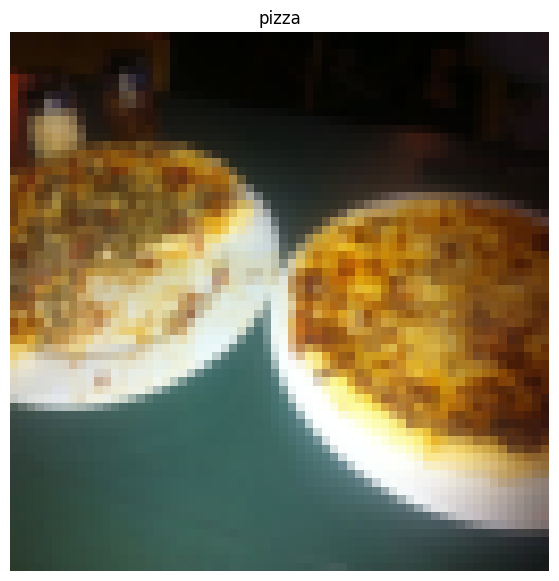

In [100]:
# Rearrange the order dimension

img_permute = img.permute(1,2,0)

# Print our different shape
print(f"Original : {img.shape} -> [color_channel,height,width]")
print(f"Image permute: {img_permute} ->[height,widht,color_channel]")
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis(False)
plt.title(class_name[label])

### 4.1 Turn loaded images into DataLoaders's

A DataLoader is going to help us turn our Dataset's into iterable and we cal customize our 

In [101]:
import os 
os.cpu_count()

8

In [102]:
# Turn train and test datasets into DataLoader


BATCH_SIZE=1
train_dataloader=DataLoader(train_data,
                            batch_size=BATCH_SIZE,
                            num_workers=os.cpu_count(),
                            shuffle=True)

test_datalaoder=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                           num_workers=os.cpu_count(),
                           shuffle=False)

In [103]:
len(train_dataloader),len(test_datalaoder)

(225, 75)

In [104]:
img,label=next(iter(train_dataloader))

# Batch size is now only 1 , can chage the batch size when want to do

print(f"image shape: {img.shape} -> [batch_size, color_channel, height, width]")
print(f"Label shape: {label.shape}")

image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channel, height, width]
Label shape: torch.Size([1])


## 5. Option 2: Loading image data with a custom `Dataset`
  
  1. Want to be able to load images from file
  2. Want to be able to get class names from the Dataset
  3. Want to be able to get classes as dictionary from the Dataset

Pros:

  * Create a `Dataset` out of almost anything
  * Not limited to PyTorch pre-built `Dataset` functions

Cons:
  * Even through you could create `Dataset` out of almost anything, it doesn't mean it will work...
  * Using a custom `Dataset` often result in us writing more code, which could be prone to errors or performance issues


All custom datasets in PyTorch, often subclass: https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset

In [105]:
# Instance of torchVision.datasets.ImageFolder()

train_data.classes , train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Create a helper function to get class names

We want a function to :
 
 1. Get the class names using `os.scandir()` to traverse a target directory(ideally the directory is in satandard image clasification format).
 2. Raise an error if the class names aren't found (if this happens, there might be something worng with the directory structure)
 3. Turn the class names into a dict and a list and return them
 

In [106]:
list(os.scandir(image_path/"train"))

[<DirEntry 'pizza'>, <DirEntry 'steak'>, <DirEntry 'sushi'>]

In [107]:
# Setup path for target directory

target_directory = train_dir

print(f"Target dir: {target_directory}")

# Get the class names from the target directory

class_name_found= sorted([entry.name for entry in list(os.scandir(target_directory))])
class_name_found

Target dir: data\pizza_steak_sushi\train


['pizza', 'steak', 'sushi']

In [108]:
def find_classes(directory:str) -> Tuple[List[str] , Dict[str,int]]:

    """ Finds the class folder names in a target directory """

    # 1. Get the classes names by scanning the target directory

    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    # 2. Rasie an error if class names could not be found

    if not classes:
        raise FileNotFoundError(f"Coundn't find any classes in {directory} ..... Please check file structure. ")
    

    # 3. Create a dictionary of index labels (computer prefer numbers rather than strings as labels)
    class_to_idx= {class_name : i for i , class_name in enumerate(classes)}
    
    return classes , class_to_idx

In [109]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom `Dataset` to replicate `ImageLoader`

To create our own custom dataset, we want to:
  
  1. Subclass `torch.utils.data.Dataset`
  2. Init our subclass with a targer directory ( the directory we'd like to get data from) as well as a transform if we'd like to transform our data.
  3. Create several attributes:  
    * paths - paths of our images
    * transform - the transform we'd like to use
    * classes - a list of the target classes 
    * class_to_idx - a dict of the target classes mapped to integer labels
  4. Create a function `load_image()` , this function of our dataset
  5. Overwrite the `__len__()` method to return the length of our dataset
  6. Overwrite the `__getitem()__` method to returnn a simple when passed an index


In [110]:
# 0. Write  a custom dataset Class 
from torch.utils.data import Dataset

# 1. SubClass torch.utils.data.Dataset

class ImageFolderCustom(Dataset):
     # 2. Initailize our custom dataset
     def __init__(self, targ_dir:str,transform=None):
          
          # 3. Create class attribute

          # Get all of the image paths
          self.path = list(pathlib.Path(targ_dir).glob("*/*.jpg"))

          # Setup transform
          self.transform=transform

          # Create classes and class_to_idx attributes
          self.classes , self.class_to_idx = find_classes(targ_dir)

    # 4. Create a function to load images

     def load_image(self, index:int) -> Image.Image:

          "open and image via a path and return it."
          image_path=self.path[index]
          return Image.open(image_path)
     
     # 5. Overwrite __len__()

     def __len__(self) ->int:
          "Returns the total number of samples"
          return len(self.path)
     
     # 6. Overwrite __getitem__() method to return a particular sample

     def __getitem__(self, index:int) -> Tuple[torch.Tensor ,int]:

          "Return one sample of data , datas and label (X,y)."
          img=self.load_image(index)
          class_name=self.path[index].parent.name # Expect path in format: data_folder/class_name.image.jpg
          class_idx=self.class_to_idx[class_name]

          # Transform if necessary 

          if self.transform:
               return self.transform(img),class_idx # return data, label (X,y) 
          else:
               return img, class_idx # return untrasform image and lable


    

In [111]:
# Create a transform

train_transforms=transforms.Compose([
                                    transforms.Resize(size=(64,64)),
                                    transforms.RandomHorizontalFlip(p=0.5),
                                    transforms.ToTensor()
])

test_transforms=transforms.Compose([
                                    transforms.Resize(size=(64,64)),
                                    transforms.RandomHorizontalFlip(p=0.5),
                                    transforms.ToTensor()
])


In [112]:
# Test out ImageFolderCustom

train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)

test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)

In [113]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x20cf4be05e0>,
 <__main__.ImageFolderCustom at 0x20cce239250>)

In [114]:
len(train_data) , len(train_data_custom)

(225, 225)

In [115]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [116]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [117]:
# Check for equality between original ImageFolder Database and ImageFolder

print(train_data_custom.classes == train_data.classes)
print(test_data_custom.classes == test_data.classes)

True
True


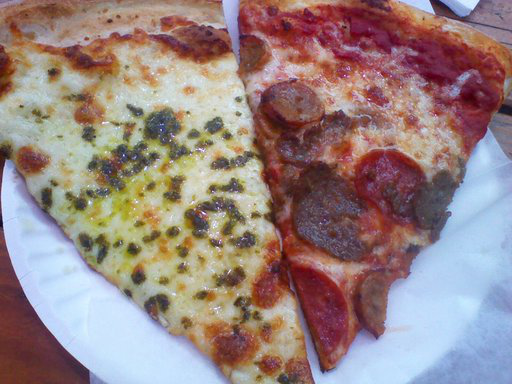

In [118]:
train_data_custom.load_image(12)

### 5.3 Create a function to display random iamges
  
  1. Take in  a 'Dataset` and a number of other parameters such as class names and how many images to visualize.
  2. To prevent the display getting out of hand, let's cap the number of images to see at 10.
  3. Set the random seed for  reproductibility
  4. Get a list of random sample indexes from the target dataset.
  5. Setup a matplotlib plot .
  6. Loop through the random sample images and plot them with matplotlib
  7. Make sure the dimensions of our imags line up with matplotlib(HWC)

In [119]:
# 1. Create a function to take a dataset

def display_random_images(datasets: torch.utils.data.Dataset,
                          classes : List[str]=None,
                          n: int =10,
                          seed: int=None,
                          display_shape:bool=True):
    # 2. Adjust display if n is too high
    if n>10:
        n=10
        display_shape=False
        print(f"For display purpose, n shouldn't be larger than 10, setting to 10 and removing shape display. ")

    # 3. Set the seed
    
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes 
    radom_sample_idx=random.sample(range(len(datasets)),k=n)
    
    # Set up matplotlib and loop through the random sample
    plt.figure(figsize=(27,9))

    # 6. loop through random indexes and plot them with matplotlib
    for i in range(0,n):
        targ_img,targ_label=datasets[radom_sample_idx[i]][0], datasets[radom_sample_idx[i]][1]

        # 7. Adjust the dimension for ploting
        targ_img_adjust=targ_img.permute(1,2,0)

        # Plot adjusted samples
        plt.subplot(1,n,i+1)
        plt.imshow(targ_img_adjust)
        plt.axis(False)
        if classes :
            title=f"Classes : {classes[targ_label]}"

            if display_shape:
                title = title + f"\n Shape : {targ_img_adjust.shape}"

        plt.title(title)
        
        
        






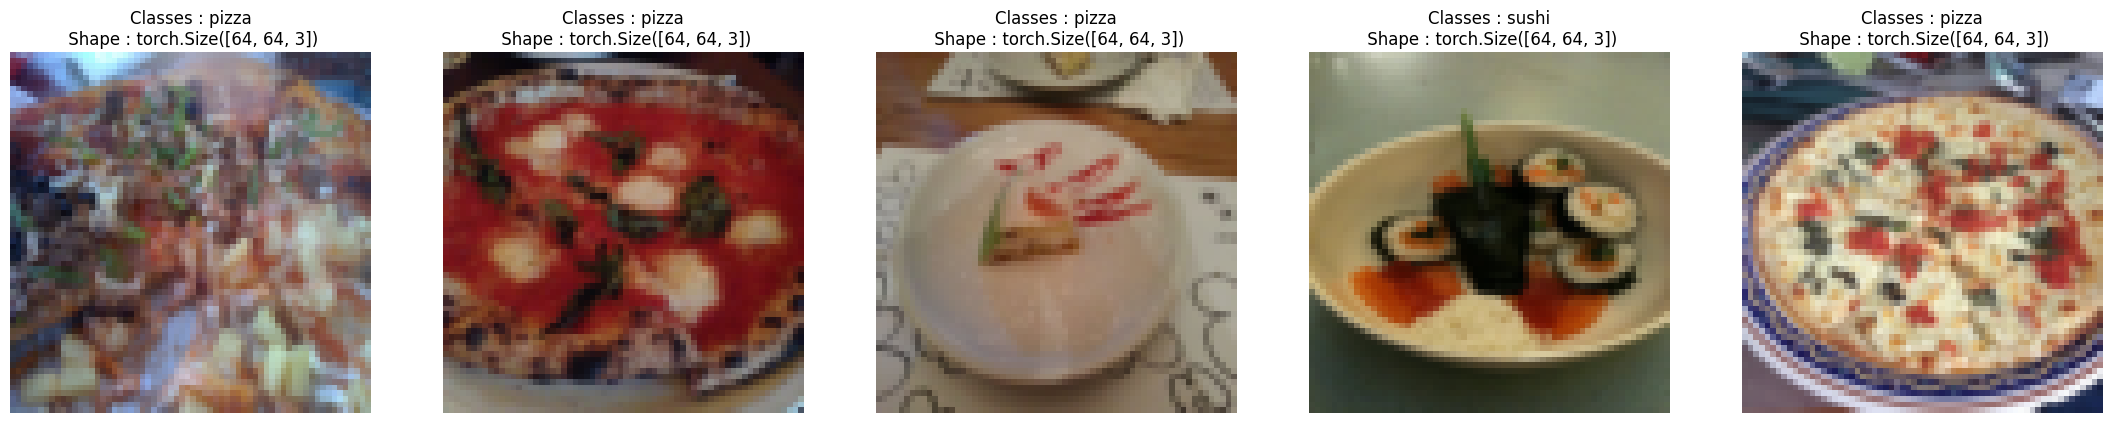

In [120]:
# Display random images from the ImageFolder created Dataset
display_random_images(train_data,
                      classes=train_data.classes,
                      n=5,
                      seed=None)

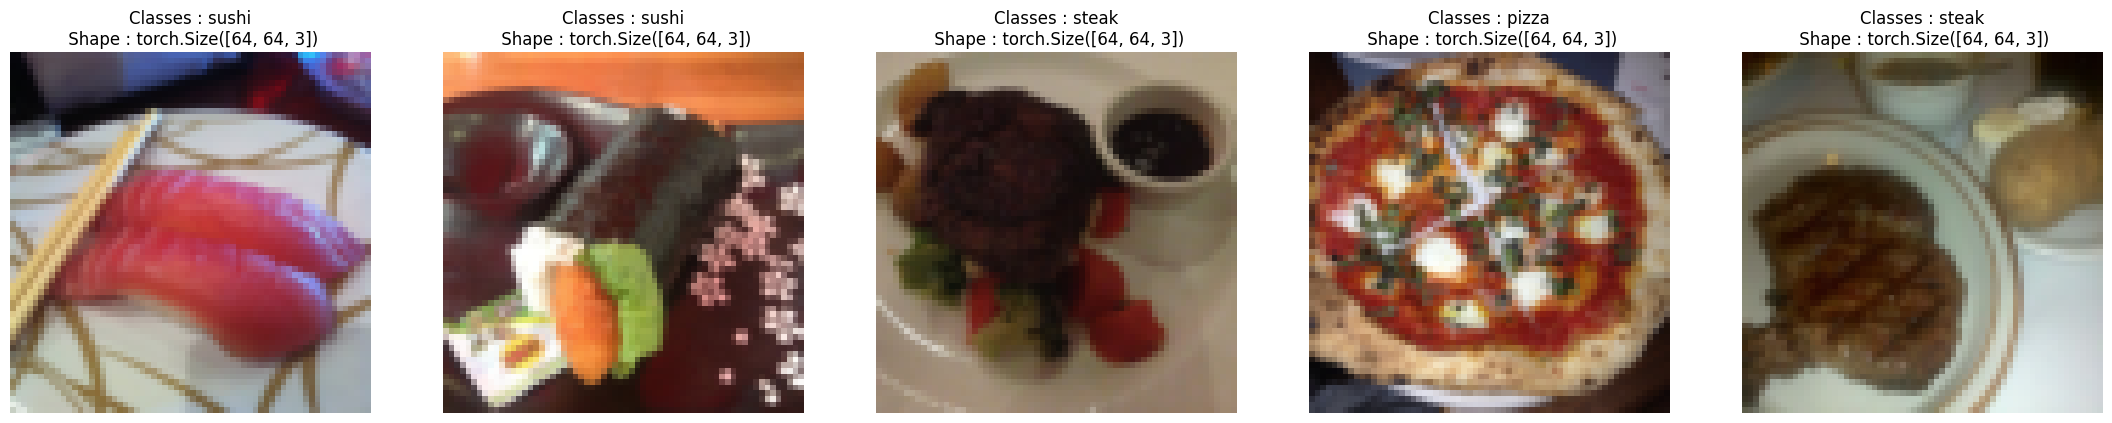

In [121]:
# Dataset random images from the ImageFolderCustom created dataset

display_random_images(train_data_custom,
                      classes=train_data_custom.classes,
                      n=5,
                      seed=None)

### 5.4 Turn custom loaded images into DataLoader's

In [122]:
BATCH_SIZE=1
train_dataloader_custom=DataLoader(dataset=train_data_custom,
                                   batch_size=BATCH_SIZE,
                                   shuffle=True,)

test_dataloader_custom=DataLoader(dataset=test_data,
                                  batch_size=BATCH_SIZE,
                                  shuffle=False,
                                  )

In [123]:
train_dataloader_custom,test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x20c86755910>,
 <torch.utils.data.dataloader.DataLoader at 0x20c86755e80>)

In [124]:
# Get image and label from custom dataloader

img_custom, label_custom = next(iter(train_dataloader_custom))

# Print out the shape

img_custom.shape, label_custom.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

## 6. Other form transform (data augmentation)

Data augmentation is the process of artificailly adding diversity to your training data.

In the case of image data, this may mean applying various transformations to the training images.

This practice hopefully results in a model that's more generalized to unseen data.

Let's take a look at one particular type of data augmentation used to train PyTorch vision models state of art levels.....

In [125]:
# Let's look at trivialAugment : link

from torchvision import transforms

train_transform = transforms.Compose([transforms.Resize(size=(64,64)),
                                      transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                      transforms.ToTensor()
                                      ])

test_transform= transforms.Compose([transforms.Resize(size=(64,64)),
                                    transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                    transforms.ToTensor()])

Random image path: data\pizza_steak_sushi\train\steak\421476.jpg
image class : steak
image_height: 512
image widht: 512


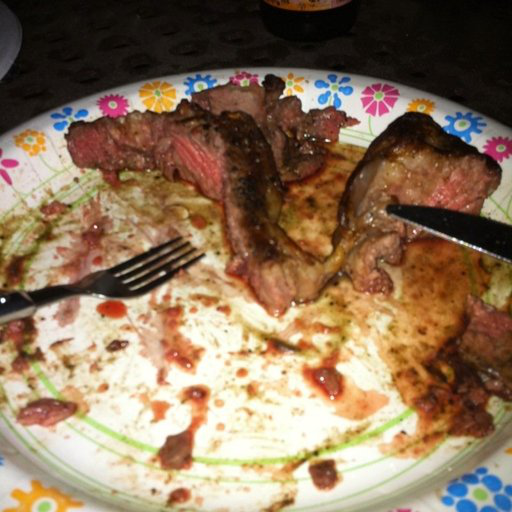

In [126]:
# Get all the image path

image_path_list=list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

# Plot random Image

random_image_path=random.choice(image_path_list)
random_image_path

# Find the class of random image path 

random_image_path_class=random_image_path.parent.stem
random_image_path_class

# Open Image with PIL
img=Image.open(random_image_path)
# 5. Print metadata

print(f"Random image path: {random_image_path}")
print(f"image class : {random_image_path_class}")
print(f"image_height: {img.height}")
print(f"image widht: {img.width}")
img

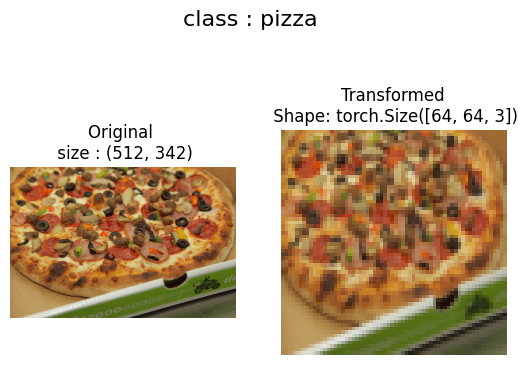

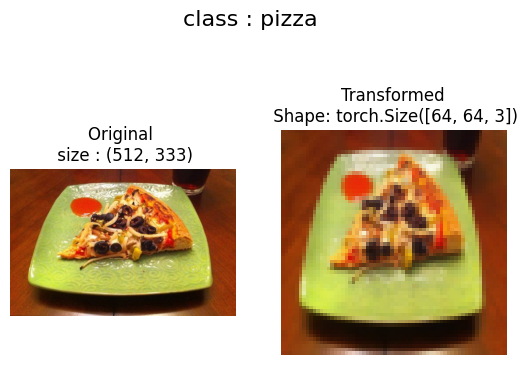

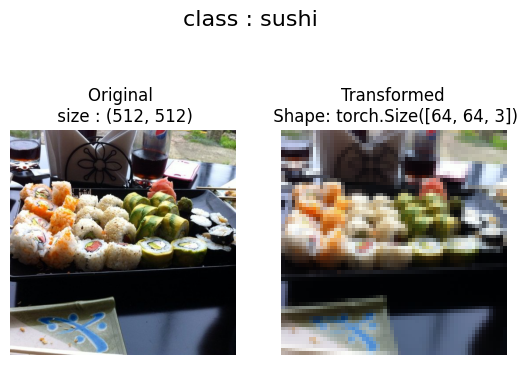

In [127]:
# Plot random transform image

plot_transformed_images(image_path_list=image_path_list,
                        transforms=train_transform,
                        n=3,
                        seed=None)

## 7. Model 0: TinyVGG without data augmentation

Let's replicate TinyVGG architechture from the CNN Explainer websites : 


### 7.1 Creating transforms and loading data for Model 0

In [128]:
# Create sample transform 

simple_transform = transforms.Compose([
                                        transforms.Resize(size=(64,64)),
                                        transforms.ToTensor()
])


In [129]:
# 1. Load and transform data 
from torchvision import datasets

train_data_simple=datasets.ImageFolder(root=train_dir,
                                       transform=simple_transform,
                                       target_transform=None)

test_data_simple=datasets.ImageFolder(root=test_dir,
                                      transform=simple_transform,
                                      target_transform=None)

# 2. Turn the dataset into DataLoader



  # Setup batch size and number of works

BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()

  # Create DataLoader's 

train_dataloader_simple=DataLoader(dataset=train_data_simple,
                                   batch_size=BATCH_SIZE,
                                   shuffle=True,
                                   num_workers=NUM_WORKERS)


test_dataloader_simple=DataLoader(dataset=test_data_simple,
                                  batch_size=BATCH_SIZE,
                                  shuffle=False,
                                  num_workers=NUM_WORKERS)

### 7.2 Create TinyVGG model class  

In [130]:
class TinyVGG(nn.Module):
    """
    Model architechture copying TinyVGG from CNN Explainer: 

    """
    def __init__(self,
                 input_shape:int,
                 hidden_unit:int,
                 output_shape:int)-> None:
        super().__init__()
        self.conv_block_1=nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                       out_channels=hidden_unit,
                       kernel_size=3,
                        stride=1,
                        padding=0),
            nn.ReLU(),

            nn.Conv2d(in_channels=hidden_unit,
                      out_channels=hidden_unit,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
             
                                        
        )
        self.conv_block_2=nn.Sequential(
            nn.Conv2d(in_channels=hidden_unit,
                       out_channels=hidden_unit,
                       kernel_size=3,
                        stride=1,
                        padding=0),
            nn.ReLU(),

            nn.Conv2d(in_channels=hidden_unit,
                      out_channels=hidden_unit,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
             
                                        
        )
        self.classifier=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_unit*13*13,
                      out_features=output_shape)
        )
    
    def forward(self,x):

        x=self.conv_block_1(x)
        # print(f"By passing through block 1, Getting shape: {x.shape}")
        x=self.conv_block_2(x)
        # print(f"By passing through block 2, getting shape {x.shape}")
        x=self.classifier(x)

        return x

In [131]:
model_0=TinyVGG(input_shape=3,
        hidden_unit=10,
        output_shape=len(class_name)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

### 7.3 Try a forward pass on a single image (to test the model)

In [132]:
# Get a single image batch

image_batch, label_batch=next(iter(train_dataloader_simple))
image_batch.shape,label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [133]:
# Try a forward pass

model_0(image_batch.to(device))

tensor([[ 2.2371e-02,  4.1339e-03,  3.3732e-02],
        [ 2.1686e-02,  1.5794e-03,  3.6504e-02],
        [ 1.8429e-02,  4.5100e-04,  3.6648e-02],
        [ 1.9679e-02, -7.2624e-03,  3.5849e-02],
        [ 1.7288e-02, -1.0097e-05,  3.4441e-02],
        [ 2.2216e-02,  5.8873e-03,  3.7406e-02],
        [ 2.5741e-02,  4.4355e-03,  3.6304e-02],
        [ 1.8566e-02,  8.7578e-05,  4.0072e-02],
        [ 2.3400e-02,  4.5266e-03,  3.6679e-02],
        [ 2.4646e-02,  6.2951e-03,  3.3209e-02],
        [ 1.8329e-02,  8.6481e-04,  3.5047e-02],
        [ 2.3417e-02,  8.7732e-03,  3.5161e-02],
        [ 2.1773e-02,  4.9135e-03,  3.6211e-02],
        [ 1.8349e-02,  1.7271e-03,  3.5004e-02],
        [ 1.8690e-02,  3.8076e-04,  3.3626e-02],
        [ 1.7316e-02,  2.1721e-03,  3.5865e-02],
        [ 2.4617e-02,  8.4414e-03,  3.3849e-02],
        [ 1.8848e-02, -3.9951e-03,  3.5782e-02],
        [ 2.0450e-02,  1.2601e-03,  3.6032e-02],
        [ 1.9950e-02,  4.8051e-03,  3.7480e-02],
        [ 2.5197e-02

### 7.4 use TorchInfo to get an idea of the shapes going through our model

In [134]:
# Install torchinfo , import if it's available

try:
    import torchinfo
except:
    %pip install torchinfo
    import torchinfo

In [135]:
from torchinfo import summary

summary(model_0,input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

## 7.5 Create train and test loops functions

 * `train_step()` - takes in a model and dataloader and trains the model on the dataloader.

 * `test_step()` - takes in a model and dataloader and evaluate the on the dataloader.

In [136]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [137]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

### 7.6 Create a `train()` function to combile `train_step()` and `test_step()`

In [138]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 500):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [139]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_unit=10, 
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_0_results = train(model=model_0, 
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1063 | train_acc: 0.3047 | test_loss: 1.0983 | test_acc: 0.3116
Epoch: 2 | train_loss: 1.0995 | train_acc: 0.3320 | test_loss: 1.0699 | test_acc: 0.5417
Epoch: 3 | train_loss: 1.0863 | train_acc: 0.4922 | test_loss: 1.0800 | test_acc: 0.5227
Epoch: 4 | train_loss: 1.0826 | train_acc: 0.4102 | test_loss: 1.0599 | test_acc: 0.5729
Epoch: 5 | train_loss: 1.0630 | train_acc: 0.4141 | test_loss: 1.0609 | test_acc: 0.5540
Total training time: 94.860 seconds


In [140]:
model_0_results

{'train_loss': [1.1063424199819565,
  1.0994838774204254,
  1.0862888097763062,
  1.0826271772384644,
  1.0630080699920654],
 'train_acc': [0.3046875, 0.33203125, 0.4921875, 0.41015625, 0.4140625],
 'test_loss': [1.0983142852783203,
  1.0698525508244832,
  1.0800263086954753,
  1.0598560571670532,
  1.0609389543533325],
 'test_acc': [0.31155303030303033,
  0.5416666666666666,
  0.5227272727272728,
  0.5729166666666666,
  0.5539772727272728]}

### 7.8 Plot the loss curves of Model 0

A **loss curve** is a way of tracking your model's progress over time.

A good guide for different loss curves can be seen here: https://developers.google.com/machine-learning/testing-debugging/metrics/interpretic

In [141]:
# Get the model_0_results keys

model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [142]:
def plot_loss_curve(result: Dict[str, List[float]]):
    """ plot traning curve of a result dictionary."""

    # Get the loss values of the results dictionary(training and test)

    loss=result["train_loss"]
    test_loss=result["test_loss"]

    # Get the accuracy values of the results dictionary (training and test)

    accuracy = result["train_acc"]
    test_accuracy=result["test_acc"]


    # Figure out how many epochs there were 

    epochs=range(len(result["train_loss"]))

    #Setup a plot

    plt.figure(figsize=(15,7))

    # Plot the loss

    plt.subplot(1,2,1)
    plt.plot(epochs,loss,label="train_loss")
    plt.plot(epochs,test_loss,label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.ylabel("loss")
    plt.legend()

    # Plot the accuracy

    plt.subplot(1,2,2)
    plt.plot(epochs,accuracy,label="train_accuracy")
    plt.plot(epochs,test_accuracy,label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()





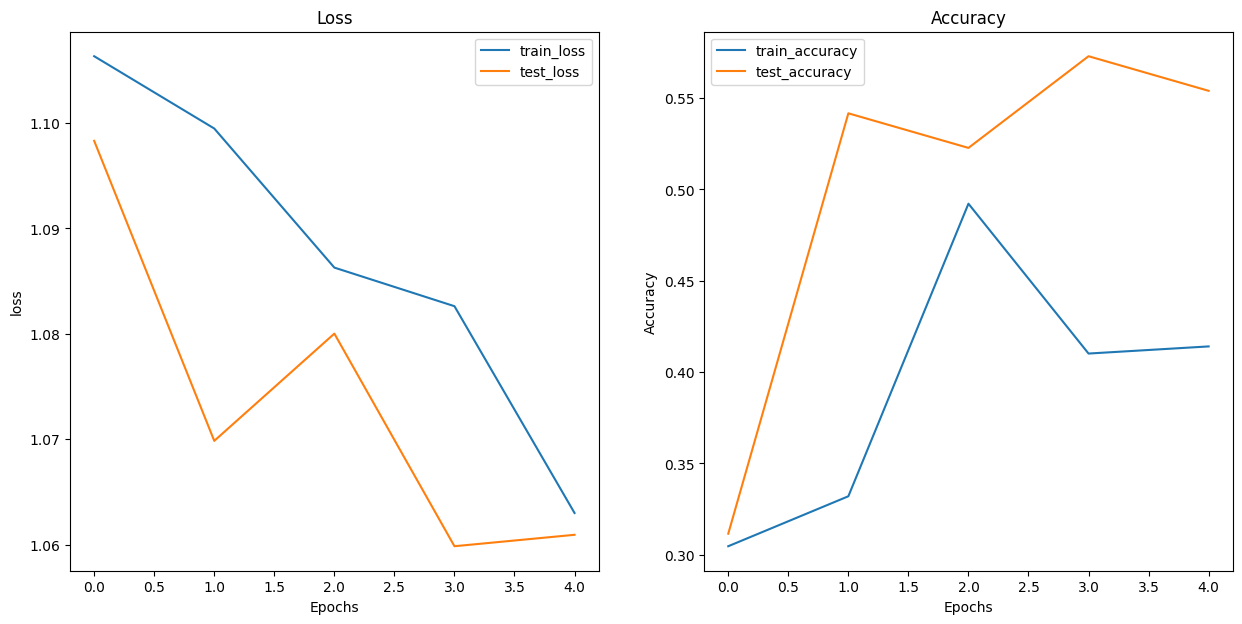

In [143]:
plot_loss_curve(model_0_results)